In [1]:
# Importing the required libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
# Reading the csv file and putting it into 'df' object.
df = pd.read_csv("M:\Imarticus\python project\crop-varietal-identification-with-scio\Barley.data.csv")
df.head()

,Predictor,740,741,742,743,744,745,746,747,748,...,1061,1062,1063,1064,1065,1066,1067,1068,1069,1070
0,HB-52,1.499853,1.500665,1.501564,1.502536,1.503537,1.504548,1.505588,1.506689,1.507828,...,1.636411,1.637350,1.636452,1.634370,1.632287,1.630265,1.630722,1.633166,1.636204,1.637872
1,HB-52,1.530877,1.531669,1.532524,1.533419,1.534308,1.535169,1.536024,1.536916,1.537830,...,1.643299,1.644222,1.643302,1.641195,1.639088,1.637046,1.637493,1.639938,1.642981,1.644649
2,HB-52,1.607175,1.608642,1.610044,1.611357,1.612540,1.613585,1.614534,1.615456,1.616359,...,1.703343,1.704291,1.703329,1.701137,1.698946,1.696822,1.697278,1.699806,1.702953,1.704677
3,HB-52,1.677333,1.678098,1.678930,1.679809,1.680688,1.681539,1.682384,1.683260,1.684145,...,1.755067,1.756013,1.754996,1.752716,1.750441,1.748238,1.748696,1.751290,1.754525,1.756294
4,HB-52,1.507830,1.509293,1.510683,1.511977,1.513145,1.514180,1.515125,1.516049,1.516964,...,1.641968,1.642877,1.641946,1.639829,1.637714,1.635664,1.636101,1.638535,1.641567,1.643227


In [3]:
#collecting indepedent variables in X
X = df.iloc[:,1:332]
X_col = X.columns
X.head()

,740,741,742,743,744,745,746,747,748,749,...,1061,1062,1063,1064,1065,1066,1067,1068,1069,1070
0,1.499853,1.500665,1.501564,1.502536,1.503537,1.504548,1.505588,1.506689,1.507828,1.508937,...,1.636411,1.637350,1.636452,1.634370,1.632287,1.630265,1.630722,1.633166,1.636204,1.637872
1,1.530877,1.531669,1.532524,1.533419,1.534308,1.535169,1.536024,1.536916,1.537830,1.538712,...,1.643299,1.644222,1.643302,1.641195,1.639088,1.637046,1.637493,1.639938,1.642981,1.644649
2,1.607175,1.608642,1.610044,1.611357,1.612540,1.613585,1.614534,1.615456,1.616359,1.617205,...,1.703343,1.704291,1.703329,1.701137,1.698946,1.696822,1.697278,1.699806,1.702953,1.704677
3,1.677333,1.678098,1.678930,1.679809,1.680688,1.681539,1.682384,1.683260,1.684145,1.684969,...,1.755067,1.756013,1.754996,1.752716,1.750441,1.748238,1.748696,1.751290,1.754525,1.756294
4,1.507830,1.509293,1.510683,1.511977,1.513145,1.514180,1.515125,1.516049,1.516964,1.517836,...,1.641968,1.642877,1.641946,1.639829,1.637714,1.635664,1.636101,1.638535,1.641567,1.643227


In [5]:
#collecting depedent variable in Y
Y=df['Predictor']
Y=pd.DataFrame(Y)

In [6]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
Y_encoded = Y.apply(le.fit_transform)
Y_encoded.head()

,Predictor
0,21
1,21
2,21
3,21
4,21


Pre-processing methods are helpful in eliminating noise generated by spectral data. Raw spectral data were thus processed using a combination of scatter corrections that include Standard Normal Variate (SNV) as well as first and second degree derivatives. The Savitzky-Golay and Gap-segment derivative smoothing filtering algorithms also usefull in eliminating noise.

Here I am using Savitzky-Golay filter with second degree derivative.

In [7]:
#Savitzky-Golay filter with second degree derivative.
from scipy.signal import savgol_filter 

sg=savgol_filter(X,window_length=11, polyorder=3, deriv=2, delta=1.0)

In [8]:
sg_x=pd.DataFrame(sg, columns=X_col)

sg_x.head()

,740,741,742,743,744,745,746,747,748,749,...,1061,1062,1063,1064,1065,1066,1067,1068,1069,1070
0,0.000084,0.000073,0.000061,0.000050,0.000039,0.000028,0.000010,-0.000011,-0.000030,-0.000044,...,-0.000446,-0.000474,-0.000300,0.000008,0.000319,0.000781,0.001243,0.001705,0.002167,0.002629
1,0.000033,0.000027,0.000021,0.000014,0.000008,0.000001,-0.000011,-0.000024,-0.000036,-0.000042,...,-0.000446,-0.000474,-0.000300,0.000010,0.000322,0.000786,0.001250,0.001714,0.002178,0.002642
2,-0.000139,-0.000128,-0.000117,-0.000105,-0.000094,-0.000082,-0.000078,-0.000073,-0.000069,-0.000060,...,-0.000462,-0.000491,-0.000310,0.000010,0.000334,0.000815,0.001296,0.001777,0.002258,0.002738
3,0.000055,0.000043,0.000031,0.000020,0.000008,-0.000004,-0.000022,-0.000043,-0.000061,-0.000071,...,-0.000471,-0.000502,-0.000315,0.000014,0.000347,0.000842,0.001337,0.001832,0.002327,0.002822
4,-0.000148,-0.000133,-0.000119,-0.000105,-0.000091,-0.000077,-0.000069,-0.000062,-0.000055,-0.000045,...,-0.000446,-0.000473,-0.000299,0.000010,0.000322,0.000786,0.001249,0.001713,0.002176,0.002640


In [14]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(sg_x, Y_encoded ,
                                                    test_size=0.2,
                                                    random_state=123,stratify=Y)

In [15]:
from sklearn.ensemble import RandomForestClassifier

Rf = RandomForestClassifier(random_state=52)
Rf_fit=Rf.fit(X_train, y_train)

M:\software\anaconda\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [17]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Test Result:\n")        
print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, y_pred)))
print("Classification Report: \n {}\n".format(classification_report(y_test, y_pred)))
print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test,y_pred))) 

Test Result:

accuracy score: 0.8083

Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.53      0.90      0.67        10
           2       1.00      1.00      1.00        10
           3       0.91      1.00      0.95        10
           4       0.70      0.70      0.70        10
           5       1.00      1.00      1.00        10
           6       1.00      0.80      0.89        10
           7       0.80      0.80      0.80        10
           8       0.75      0.90      0.82        10
           9       0.67      0.60      0.63        10
          10       0.75      0.90      0.82        10
          11       0.62      0.50      0.56        10
          12       1.00      0.90      0.95        10
          13       1.00      1.00      1.00        10
          14       0.80      0.80      0.80        10
          15       0.62      0.50      0.56        10
          16      

In [18]:
#Reduction of variables using Recursive Feature Elimination(RFE) techineque

from sklearn.feature_selection import RFE

# RFE with 10 features

rfe_10 = RFE(Rf,10)

rfe_10.fit(X_train, y_train)

# selected features
features_bool = np.array(rfe_10.support_)
features = np.array(X_col)
result = features[features_bool]
print('10 selected Features:')
print(result)            

M:\software\anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


10 selected Features:
['756' '790' '842' '854' '954' '982' '983' '1002' '1059' '1064']


In [19]:
y_pred = rfe_10.predict(X_test)

print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, y_pred)))
print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, y_pred))) 

accuracy score: 0.7250

Confusion Matrix: 
 [[ 8  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  8  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  7  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  9  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  2  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  1  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  8  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  5  0  0  0  0  0  1  0  0  0  0  3  0]
 [ 0  0  0  0  2  0  1  0  0  0  0  0  7  0  0  0  0  0 

In [20]:
# RFE with 15 features
rfe_15 = RFE(Rf,15)

# fit with 15 features
rfe_15.fit(X_train, y_train)

# selected features
features_bool = np.array(rfe_15.support_)
features = np.array(X_col)
result = features[features_bool]
print('15 selected Features:')
print(result)        


M:\software\anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


15 selected Features:
['756' '783' '789' '790' '842' '854' '858' '954' '982' '983' '1001' '1002'
 '1038' '1059' '1064']


In [21]:
y_pred = rfe_15.predict(X_test)

print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, y_pred)))
print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, y_pred))) 

accuracy score: 0.7292

Confusion Matrix: 
 [[ 8  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  9  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  7  0  0  0  1  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  6  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  6  0  0  0  0  0  0  0  0  0  0  4  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  2  0  0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  9  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  4  0]
 [ 0  0  0  0  2  0  0  0  0  0  0  0  8  0  0  0  0  0 

In [22]:
# RFE with 17 features

rfe_17 = RFE(Rf,17)

# fit with 17 features
rfe_17.fit(X_train, y_train)

# selected features
features_bool = np.array(rfe_17.support_)
features = np.array(X_col)
result = features[features_bool]
print('17 selected Features:')
print(result)     

M:\software\anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


17 selected Features:
['756' '759' '783' '789' '790' '842' '843' '854' '858' '954' '982' '983'
 '1001' '1002' '1038' '1059' '1064']


In [23]:
y_pred = rfe_17.predict(X_test)

print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, y_pred)))
print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, y_pred))) 

accuracy score: 0.7750

Confusion Matrix: 
 [[ 8  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  7  0  0  0  0  1  0  0  0  0  0  0  1  0  0  0  0  0  0  1  0  0  0]
 [ 0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0]
 [ 0  0  1  0  7  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  2  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  2  0  0  0  0  0  0  0  8  0  0  0  0  0 

In [24]:
# RFE with 20 features

rfe_20 = RFE(Rf,20)

# fit with 20 features
rfe_20.fit(X_train, y_train)

# selected features
features_bool = np.array(rfe_20.support_)
features = np.array(X_col)
result = features[features_bool]
print('20 selected Features:')
print(result)     

M:\software\anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


20 selected Features:
['756' '759' '783' '789' '790' '799' '842' '843' '854' '858' '954' '982'
 '983' '990' '1001' '1002' '1022' '1038' '1059' '1064']


In [26]:
y_pred = rfe_20.predict(X_test)

print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, y_pred)))
print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, y_pred))) 

accuracy score: 0.7250

Confusion Matrix: 
 [[ 8  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  6  0  0  0  0  1  0  0  1  0  0  0  0  0  0  1  0  0  0  1  0  0  0]
 [ 0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  5  1  0  0  2  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0]
 [ 0  0  0  0  4  0  0  0  5  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  1  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  9  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  4  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0  9  0  0  0  0  0 

In [30]:
#collecting variables selected by Rfe 17 in X_imp
X_imp=sg_x[['756','759','783','789','790','842','843','854','858','954','982','983',
             '1001','1002','1038','1059','1064']]
X_col_imp=X_imp.columns
X_imp.head()

,756,759,783,789,790,842,843,854,858,954,982,983,1001,1002,1038,1059,1064
0,0.000019,-0.000002,-0.000017,-0.000005,-0.000007,0.000024,0.000020,0.000033,0.000020,-0.000019,0.000104,0.000137,0.000016,-0.000042,0.000024,-0.000064,0.000008
1,0.000019,-0.000009,-0.000016,-0.000007,-0.000005,0.000024,0.000016,0.000028,0.000016,-0.000025,0.000118,0.000151,0.000012,-0.000043,0.000029,-0.000064,0.000010
2,0.000026,-0.000006,-0.000016,-0.000012,-0.000011,0.000045,0.000041,0.000023,0.000023,-0.000027,0.000125,0.000158,0.000026,-0.000034,0.000030,-0.000066,0.000010
3,0.000035,0.000017,-0.000005,-0.000019,-0.000021,0.000039,0.000034,0.000022,0.000022,-0.000013,0.000111,0.000145,0.000022,-0.000039,0.000035,-0.000062,0.000014
4,0.000025,-0.000016,-0.000014,-0.000007,-0.000010,0.000036,0.000031,0.000024,0.000029,-0.000008,0.000105,0.000137,0.000027,-0.000033,0.000028,-0.000063,0.000010


In [31]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 =train_test_split(X_imp, Y_encoded,
                                                    test_size=0.2,
                                                    random_state=123,stratify=Y)
X_train1.head()

,756,759,783,789,790,842,843,854,858,954,982,983,1001,1002,1038,1059,1064
1121,-0.000010,0.000037,0.000006,-0.000004,-0.000005,0.000006,0.000017,0.000009,-0.000014,-0.000003,0.000032,0.000002,0.000080,0.000061,0.000003,-0.000102,-0.000009
880,-0.000042,0.000005,-0.000003,0.000004,0.000004,0.000016,0.000031,0.000006,-0.000015,0.000005,0.000050,0.000014,0.000088,0.000069,-0.000010,-0.000099,0.000004
408,0.000010,-0.000008,-0.000041,0.000023,0.000022,0.000010,0.000011,0.000014,-0.000002,0.000002,-0.000078,-0.000083,0.000020,0.000039,-0.000065,-0.000295,-0.000100
1176,0.000021,0.000004,-0.000026,-0.000003,-0.000003,-0.000010,-0.000003,-0.000003,-0.000005,0.000004,-0.000068,-0.000073,0.000016,0.000034,-0.000050,-0.000306,-0.000117
283,0.000029,0.000029,-0.000028,0.000018,0.000015,0.000020,0.000013,0.000042,0.000024,-0.000010,0.000090,0.000127,0.000025,-0.000041,0.000029,-0.000057,0.000014


In [32]:
from sklearn.ensemble import RandomForestClassifier

Rf = RandomForestClassifier(random_state=52)
Rf_fit=Rf.fit(X_train1, y_train1)

M:\software\anaconda\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [33]:
y_pred1 = Rf.predict(X_test1)

In [34]:
print("Test Result:\n")        
print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test1, y_pred1)))
print("Classification Report: \n {}\n".format(classification_report(y_test1, y_pred1)))
print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test1,y_pred1))) 

Test Result:

accuracy score: 0.7750

Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.70      0.70      0.70        10
           2       0.77      1.00      0.87        10
           3       0.89      0.80      0.84        10
           4       0.78      0.70      0.74        10
           5       1.00      0.80      0.89        10
           6       0.77      1.00      0.87        10
           7       0.64      0.70      0.67        10
           8       0.77      1.00      0.87        10
           9       0.78      0.70      0.74        10
          10       0.83      1.00      0.91        10
          11       0.90      0.90      0.90        10
          12       1.00      0.80      0.89        10
          13       0.91      1.00      0.95        10
          14       0.67      0.80      0.73        10
          15       0.67      0.60      0.63        10
          16      

In [49]:
#sorting features with their importance
feature_importances = pd.DataFrame(Rf.feature_importances_,
                                   index = X_col_imp,
                                    columns=['importance']).sort_values('importance',ascending=False)

print(feature_importances)

      importance
783     0.077909
1064    0.073461
1059    0.072184
983     0.066849
1038    0.061577
843     0.061523
790     0.060212
854     0.058663
756     0.057250
789     0.056165
1001    0.055357
982     0.052648
858     0.051490
842     0.050144
954     0.048654
1002    0.048390
759     0.047521


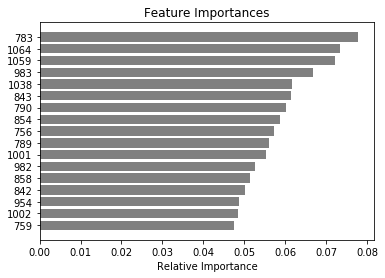

In [50]:
features =X_col_imp
importances = Rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='gray', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

conclusion:- Random Forest is giving accuracy of 80% using all 331 variables. If we reduce Variables using techineque Recursive Feature Elimination(RFE),using 17 variables (756, 759, 783, 789, 790, 842, 843, 854, 858, 954, 982, 983, 1001, 1002, 1038, 1059, & 1064) model is giving acurracy of 77%. Further increase in Variables will not affecting model accuracy as much.